In [0]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.datasets import reuters
from keras.preprocessing import sequence



In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
train_labels[10]

3

## Preparing the data

In [0]:
word_length = 700

In [0]:
train_data = sequence.pad_sequences(train_data, maxlen=word_length)
test_data = sequence.pad_sequences(test_data, maxlen=word_length)



In [0]:
from keras.utils import np_utils

train_labels = np_utils.to_categorical(train_labels, 46)
test_labels = np_utils.to_categorical(test_labels, 46)

## Building our network


## Using LSTM 

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(10000, 64))
model.add(layers.LSTM(32, input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 41s 7ms/step - loss: 2.7994 - acc: 0.3595 - val_loss: 2.3746 - val_acc: 0.3532
Epoch 2/10
6287/6287 [==============================] - 38s 6ms/step - loss: 2.2075 - acc: 0.3924 - val_loss: 2.0200 - val_acc: 0.3907
Epoch 3/10
6287/6287 [==============================] - 40s 6ms/step - loss: 1.9337 - acc: 0.4629 - val_loss: 1.8305 - val_acc: 0.4857
Epoch 4/10
6287/6287 [==============================] - 39s 6ms/step - loss: 1.8199 - acc: 0.5007 - val_loss: 1.7527 - val_acc: 0.5462
Epoch 5/10
6287/6287 [==============================] - 40s 6ms/step - loss: 1.6912 - acc: 0.5538 - val_loss: 1.6709 - val_acc: 0.5659
Epoch 6/10
6287/6287 [==============================] - 40s 6ms/step - loss: 1.6320 - acc: 0.5551 - val_loss: 1.6440 - val_acc: 0.5455
Epoch 7/10
6287/6287 [==============================] - 39s 6ms/step - loss: 1.5874 - acc: 0.5721 - val_loss: 1.6343 - val_acc: 0.5863
Epoch 8

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________


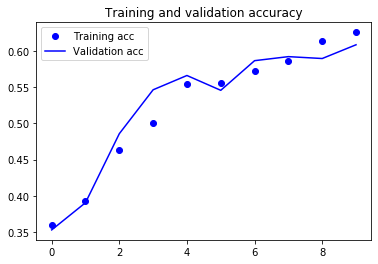

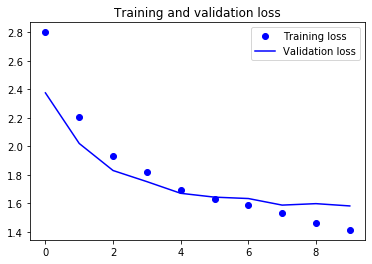

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using Dropout for overfitting lstm?


In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

dropout_model = Sequential()
dropout_model.add(Embedding(10000, 64))
dropout_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
dropout_model.add(layers.Dense(46,activation='softmax'))

dropout_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = dropout_model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Train on 6287 samples, validate on 2695 samples
Epoch 1/10
6287/6287 [==============================] - 53s 8ms/step - loss: 2.8787 - acc: 0.3397 - val_loss: 2.4269 - val_acc: 0.3532
Epoch 2/10
6287/6287 [==============================] - 48s 8ms/step - loss: 2.3470 - acc: 0.3902 - val_loss: 2.1437 - val_acc: 0.4842
Epoch 3/10
6287/6287 [==============================] - 48s 8ms/step - loss: 2.1548 - acc: 0.4595 - val_loss: 2.0390 - val_acc: 0.4846
Epoch 4/10
6287/6287 [==============================] - 48s 8ms/step - loss: 2.0213 - acc: 0.4780 - val_loss: 1.9037 - val_acc: 0.4954
Epoch 5/10
6287/6287 [==============================] - 48s 8ms/step - loss: 1.8975 - acc: 0.4920 - val_loss: 1.8481 - val_acc: 0.4909
Epoch 6/10
6287/6287 [==============================] - 49s 8ms/step - loss: 1.8098 - acc: 0.5093 - val_loss: 1.7602 - val_acc: 0.5384
Epoch 7/10
6287/6287 [==============================] - 50s 8ms/step - loss: 1.7277 - acc: 0.5365 - val_loss: 1.7305 - val_acc: 0.5432
Epoch 8

In [0]:
dropout_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 46)                1518      
Total params: 653,934
Trainable params: 653,934
Non-trainable params: 0
_________________________________________________________________


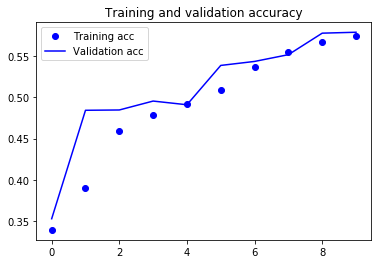

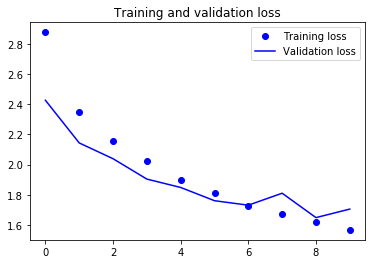

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Stacking RNNs

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

stacked_rnn_model = Sequential()
stacked_rnn_model.add(Embedding(10000, 64))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
stacked_rnn_model.add(layers.LSTM(32,dropout=0.2, recurrent_dropout=0.2))
stacked_rnn_model.add(layers.Dense(46,activation='softmax'))

stacked_rnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = stacked_rnn_model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

6287/6287 [==============================] - 141s 22ms/step - loss: 2.6533 - acc: 0.3431 - val_loss: 2.2014 - val_acc: 0.3577
Epoch 2/10
6287/6287 [==============================] - 136s 22ms/step - loss: 2.0645 - acc: 0.4167 - val_loss: 1.8757 - val_acc: 0.5091
Epoch 3/10
6287/6287 [==============================] - 135s 21ms/step - loss: 1.8566 - acc: 0.5039 - val_loss: 1.7661 - val_acc: 0.5403
Epoch 4/10
6287/6287 [==============================] - 133s 21ms/step - loss: 1.7577 - acc: 0.5319 - val_loss: 1.7197 - val_acc: 0.5529
Epoch 5/10
6287/6287 [==============================] - 134s 21ms/step - loss: 1.6806 - acc: 0.5500 - val_loss: 1.7275 - val_acc: 0.5477
Epoch 6/10
6287/6287 [==============================] - 133s 21ms/step - loss: 1.6516 - acc: 0.5527 - val_loss: 1.7136 - val_acc: 0.5536
Epoch 7/10
6287/6287 [==============================] - 132s 21ms/step - loss: 1.6060 - acc: 0.5653 - val_loss: 1.6994 - val_acc: 0.5636
Epoch 8/10
6287/6287 [==============================

In [0]:
stacked_rnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_13 (LSTM)               (None, None, 32)          12416     
_________________________________________________________________
lstm_14 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 46)                1518      
Total params: 670,574
Trainable params: 670,574
Non-trainable params: 0
_________________________________________________________________


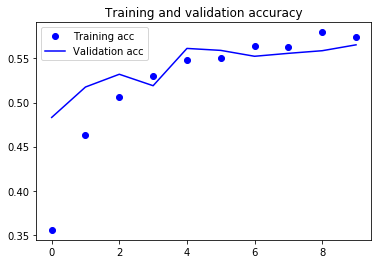

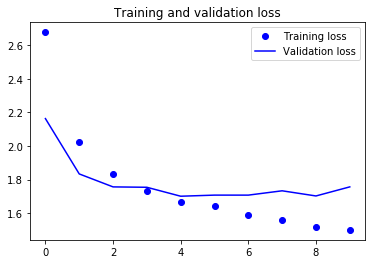

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()